In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muriti
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | kulhudhuffushi
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | sesheke
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | sardarshahr
Processing Record 11 of Set 1 | cusuna
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | malangali
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | mandera
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | namibe
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | high level
Processing Record 22 of Set 1 | kaitangata
Processing Record 2

Processing Record 39 of Set 4 | forio
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | cochrane
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | umm durman
City not found. Skipping...
Processing Record 46 of Set 4 | nanakuli
Processing Record 47 of Set 4 | phuket
Processing Record 48 of Set 4 | paradwip
City not found. Skipping...
Processing Record 49 of Set 4 | vyshchetarasivka
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | khorixas
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | vostok
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | plavsk
Processing Record 8 of Set 5 | verkhnevilyuysk
Processing Record 9 of Set 5 | mount isa
Processing Record 10 of S

Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | port elizabeth
Processing Record 34 of Set 8 | linjiang
Processing Record 35 of Set 8 | curup
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | nurota
Processing Record 39 of Set 8 | savonlinna
Processing Record 40 of Set 8 | qui nhon
Processing Record 41 of Set 8 | puro
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | amelia
Processing Record 45 of Set 8 | ozgon
City not found. Skipping...
Processing Record 46 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 8 | naroda
Processing Record 48 of Set 8 | mwinilunga
Processing Record 49 of Set 8 | filadelfia
Processing Record 50 of Set 8 | kinna
Processing Record 1 of Set 9 | sandwick
Processing Record 2 of Set 9 | vilaka
Processing Record 3 of Set 9 | bukama
Processing Record 4 of Set 9 

Processing Record 18 of Set 12 | moose jaw
Processing Record 19 of Set 12 | hays
Processing Record 20 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 21 of Set 12 | sovetsk
Processing Record 22 of Set 12 | gilbues
Processing Record 23 of Set 12 | bay roberts
Processing Record 24 of Set 12 | porterville
Processing Record 25 of Set 12 | cayenne
Processing Record 26 of Set 12 | warragul
Processing Record 27 of Set 12 | leeuwarden
Processing Record 28 of Set 12 | charters towers
Processing Record 29 of Set 12 | lasa
Processing Record 30 of Set 12 | porbandar
Processing Record 31 of Set 12 | harrai
Processing Record 32 of Set 12 | viedma
Processing Record 33 of Set 12 | olafsvik
Processing Record 34 of Set 12 | owando
Processing Record 35 of Set 12 | alice springs
Processing Record 36 of Set 12 | fraserburgh
Processing Record 37 of Set 12 | broome
Processing Record 38 of Set 12 | tabuk
Processing Record 39 of Set 12 | berdigestyakh
Processing Record 40 of Set 12 | ji

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muriti,-1.9833,32.9167,72.05,59,96,16.60,TZ,2022-07-08 00:44:51
1,Nanortalik,60.1432,-45.2371,43.43,93,43,3.47,GL,2022-07-08 00:44:51
2,Cape Town,-33.9258,18.4232,61.38,90,40,3.00,ZA,2022-07-08 00:42:31
3,Barrow,71.2906,-156.7887,42.82,87,100,8.05,US,2022-07-08 00:44:52
4,Tiksi,71.6872,128.8694,39.69,65,100,8.55,RU,2022-07-08 00:44:52
5,Kulhudhuffushi,6.6221,73.0700,81.86,83,78,18.54,MV,2022-07-08 00:44:52
6,Bredasdorp,-34.5322,20.0403,49.10,93,13,3.71,ZA,2022-07-08 00:44:53
7,Sesheke,-17.4759,24.2968,52.29,50,0,3.87,ZM,2022-07-08 00:44:53
8,Ushuaia,-54.8000,-68.3000,29.86,69,20,4.61,AR,2022-07-08 00:44:53
9,Sardarshahr,28.4333,74.4833,91.60,48,8,9.06,IN,2022-07-08 00:44:53


In [11]:
reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muriti,TZ,2022-07-08 00:44:51,-1.9833,32.9167,72.05,59,96,16.60
1,Nanortalik,GL,2022-07-08 00:44:51,60.1432,-45.2371,43.43,93,43,3.47
2,Cape Town,ZA,2022-07-08 00:42:31,-33.9258,18.4232,61.38,90,40,3.00
3,Barrow,US,2022-07-08 00:44:52,71.2906,-156.7887,42.82,87,100,8.05
4,Tiksi,RU,2022-07-08 00:44:52,71.6872,128.8694,39.69,65,100,8.55
5,Kulhudhuffushi,MV,2022-07-08 00:44:52,6.6221,73.0700,81.86,83,78,18.54
6,Bredasdorp,ZA,2022-07-08 00:44:53,-34.5322,20.0403,49.10,93,13,3.71
7,Sesheke,ZM,2022-07-08 00:44:53,-17.4759,24.2968,52.29,50,0,3.87
8,Ushuaia,AR,2022-07-08 00:44:53,-54.8000,-68.3000,29.86,69,20,4.61
9,Sardarshahr,IN,2022-07-08 00:44:53,28.4333,74.4833,91.60,48,8,9.06


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

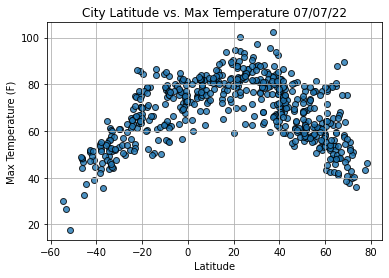

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

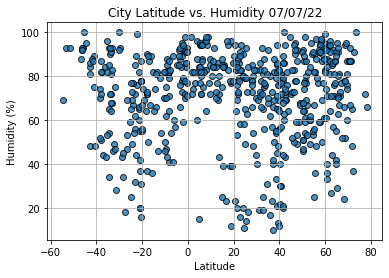

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

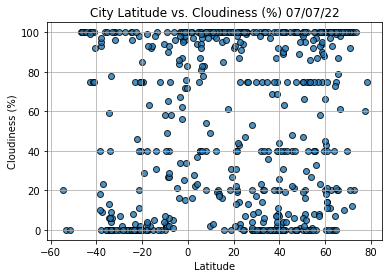

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

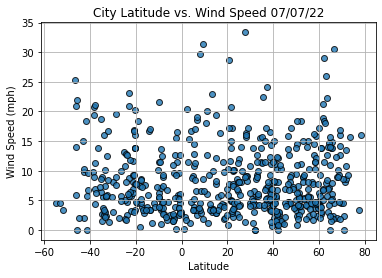

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2022-07-08 00:44:55
Lat                         57.79
Lng                     -152.4072
Max Temp                    53.11
Humidity                       94
Cloudiness                    100
Wind Speed                  12.66
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2022-07-08 00:44:51,60.1432,-45.2371,43.43,93,43,3.47
3,Barrow,US,2022-07-08 00:44:52,71.2906,-156.7887,42.82,87,100,8.05
4,Tiksi,RU,2022-07-08 00:44:52,71.6872,128.8694,39.69,65,100,8.55
5,Kulhudhuffushi,MV,2022-07-08 00:44:52,6.6221,73.0700,81.86,83,78,18.54
9,Sardarshahr,IN,2022-07-08 00:44:53,28.4333,74.4833,91.60,48,8,9.06


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

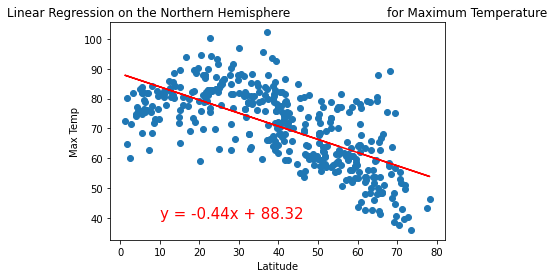

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

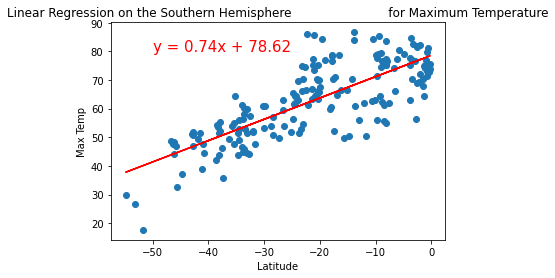

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

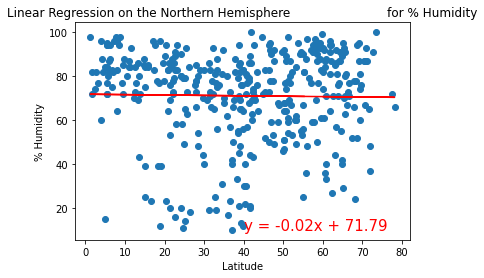

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

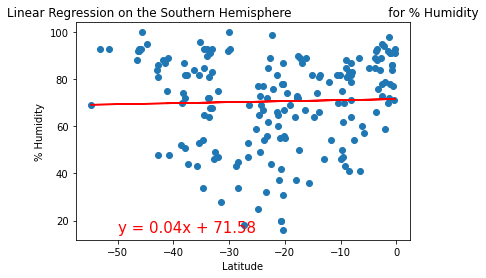

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

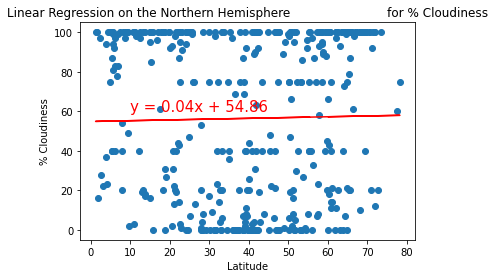

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

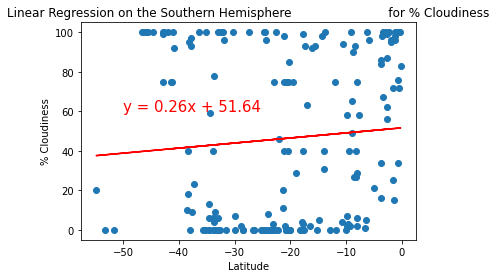

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

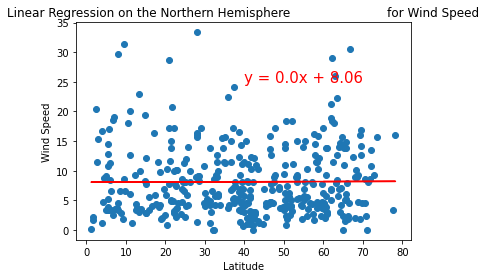

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

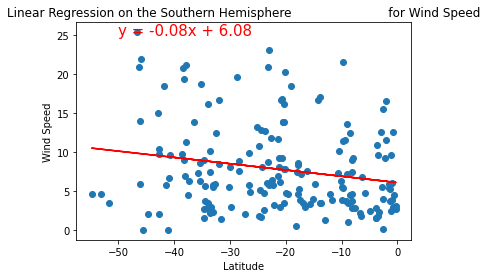

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))